##### Plotando curva de histerese para cada ângulo (sem normalização).
<p>Este script varre o diretorio onde estão localizados os arquivos .txt contendo as medidas cruas obtidas no VSM e plota eles num gráfico. Assim, é possível visualizar quais conjuntos de medidas apresentam drift, que podem ser ajustadas utilizando o script <code>faseB_histereseAjusteDrift</code>.</p>

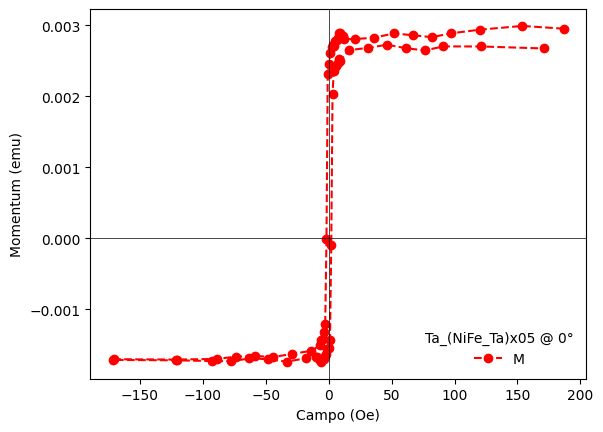

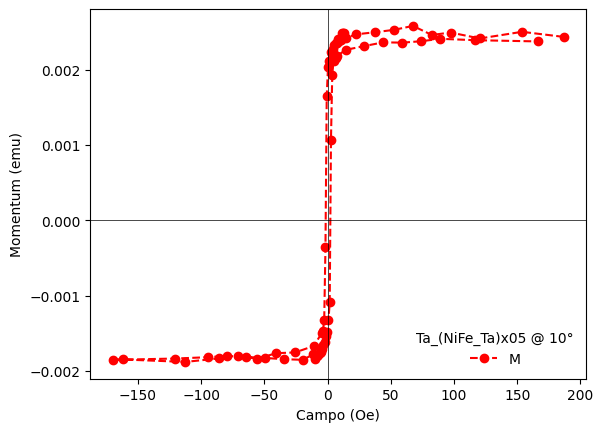

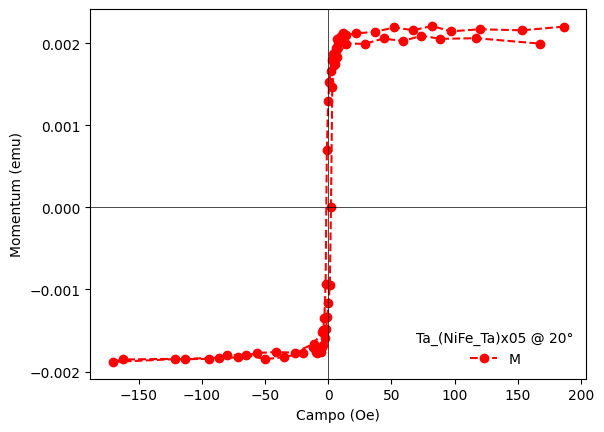

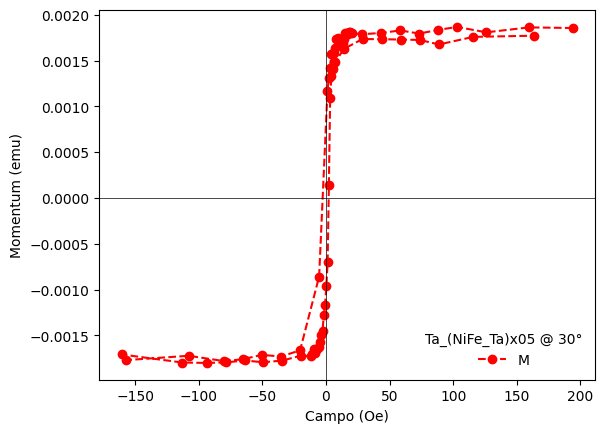

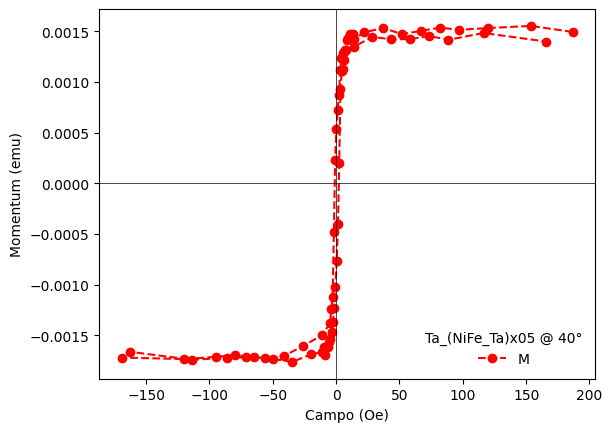

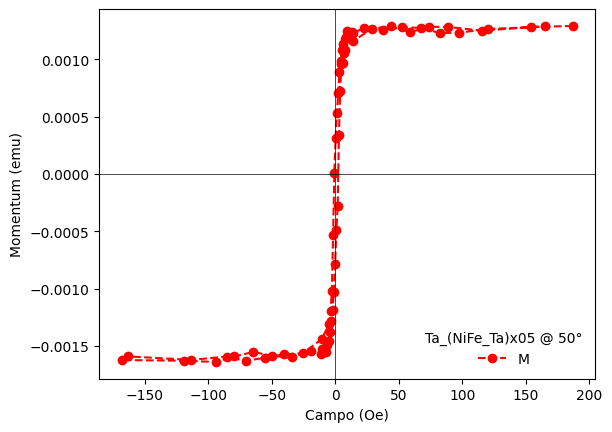

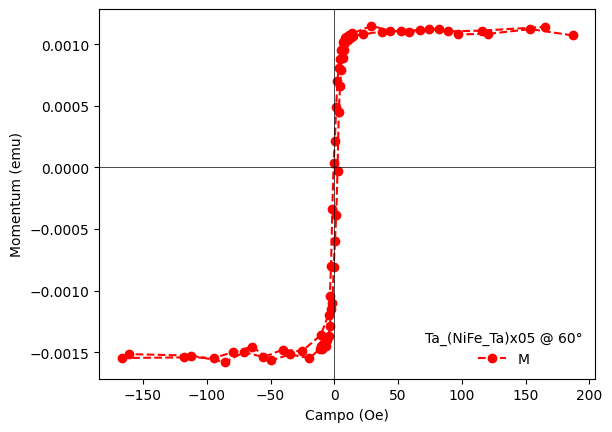

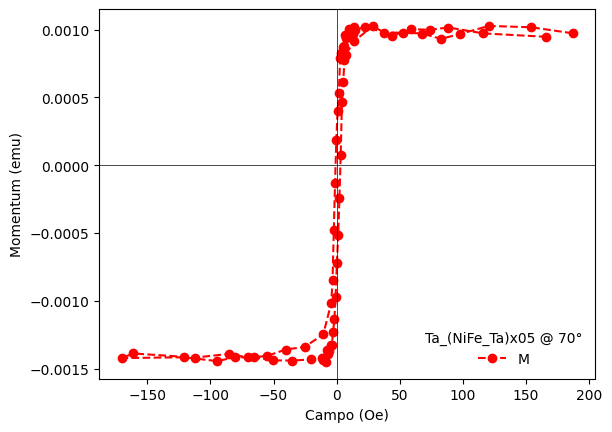

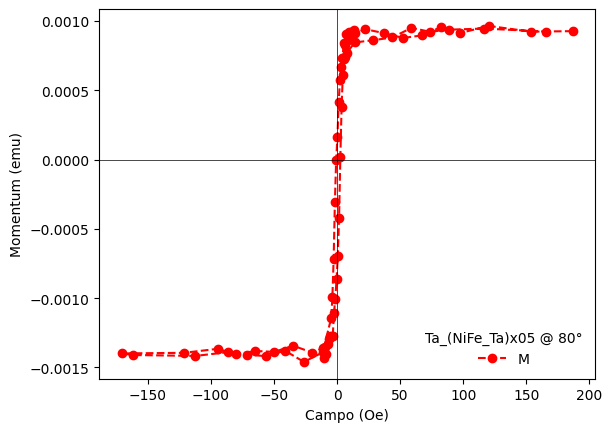

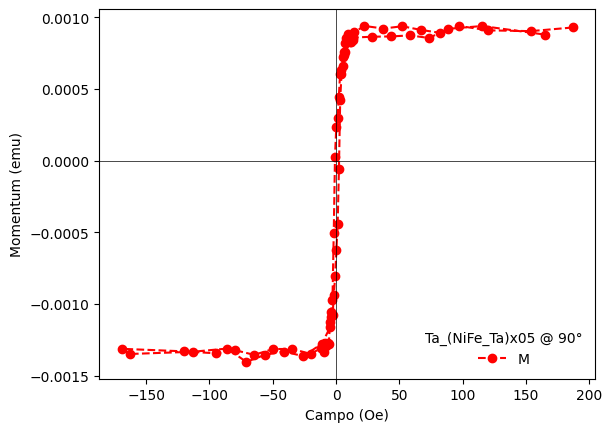

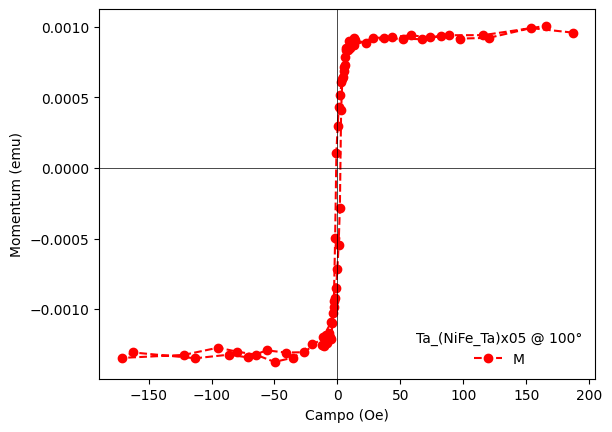

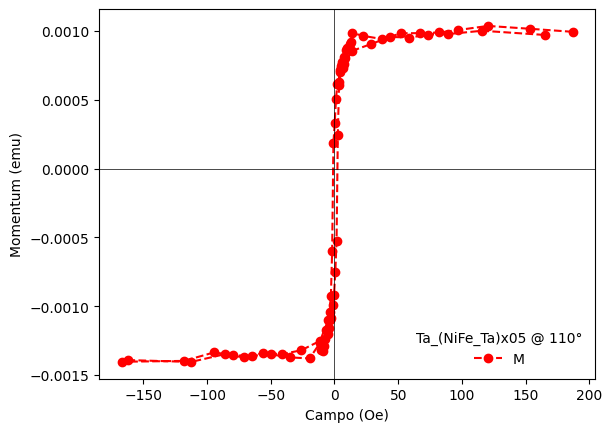

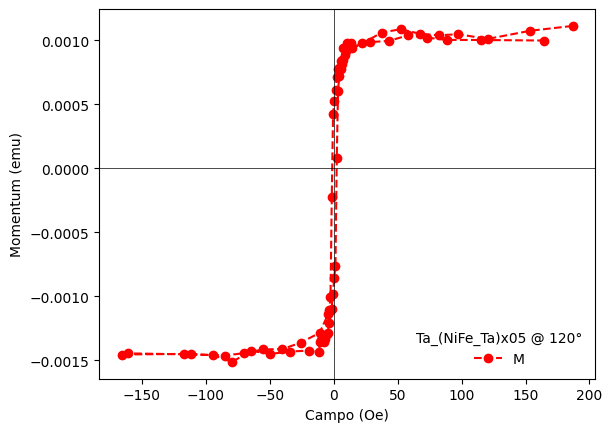

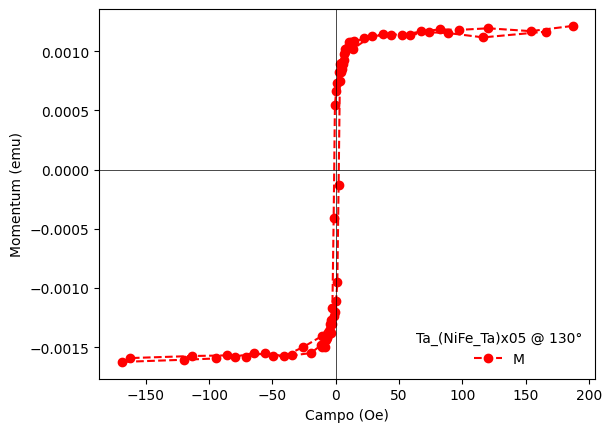

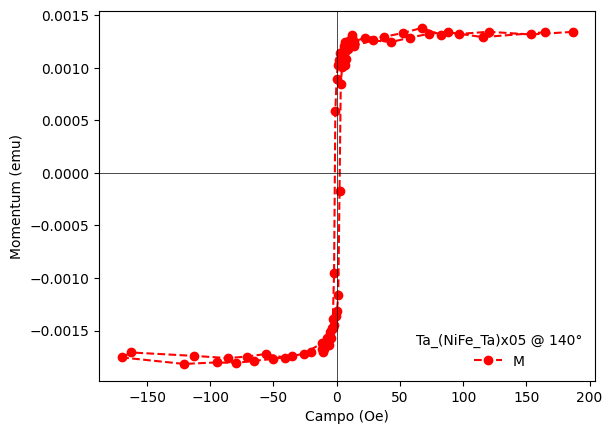

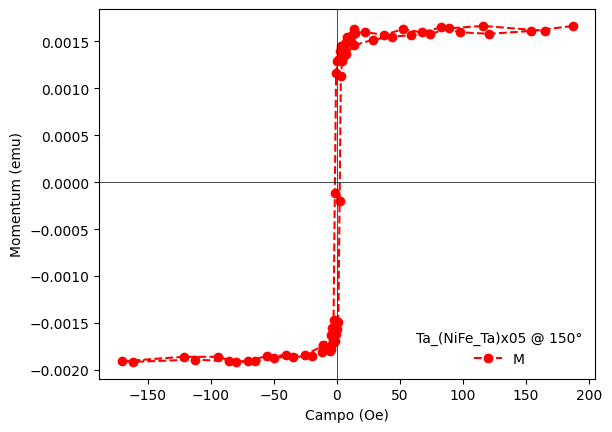

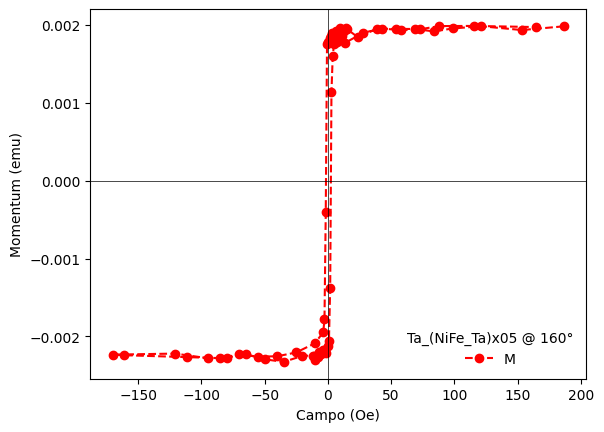

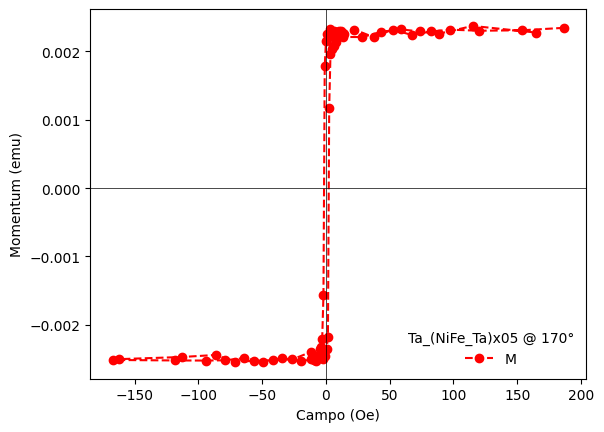

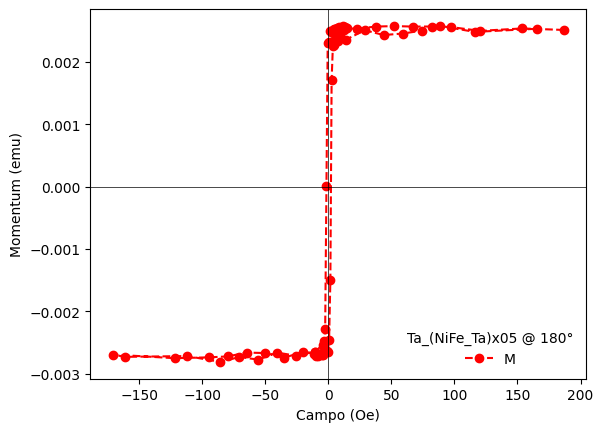

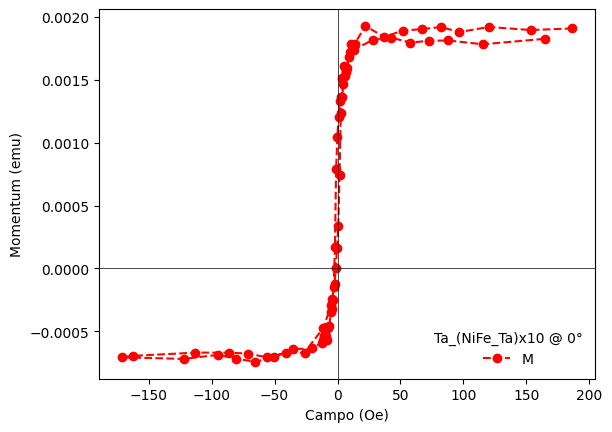

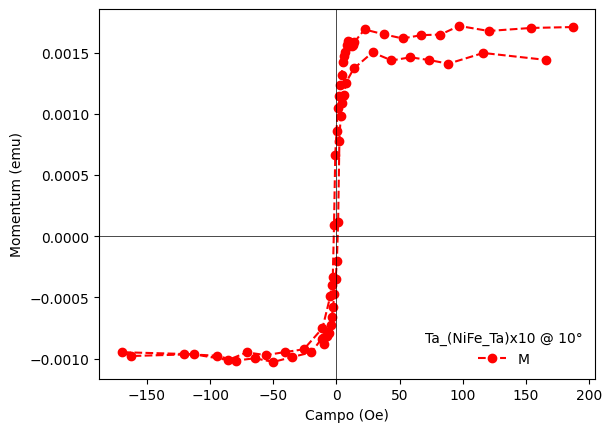

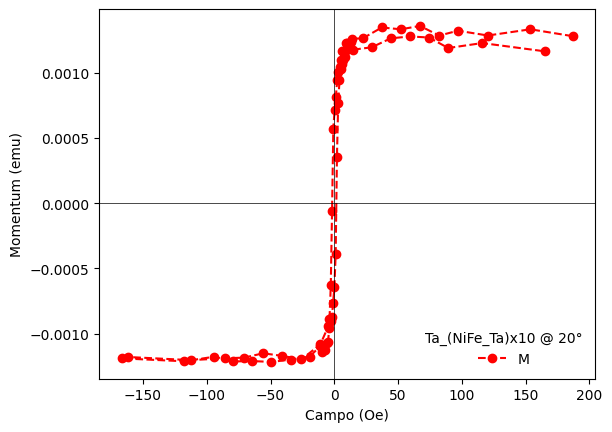

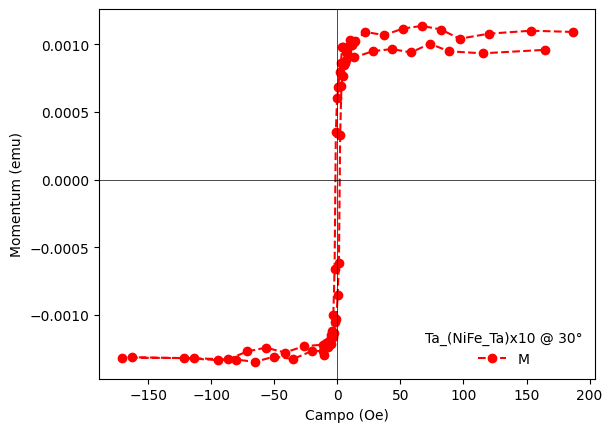

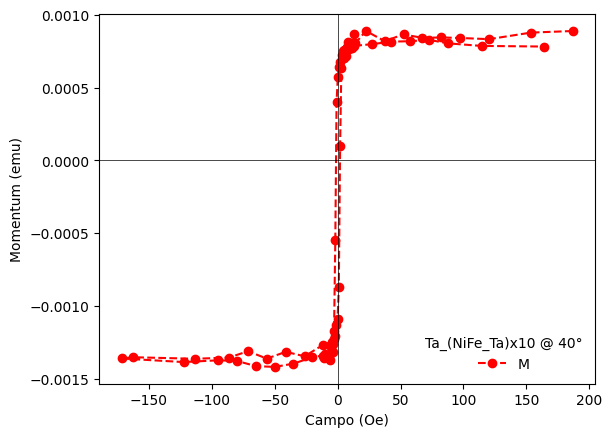

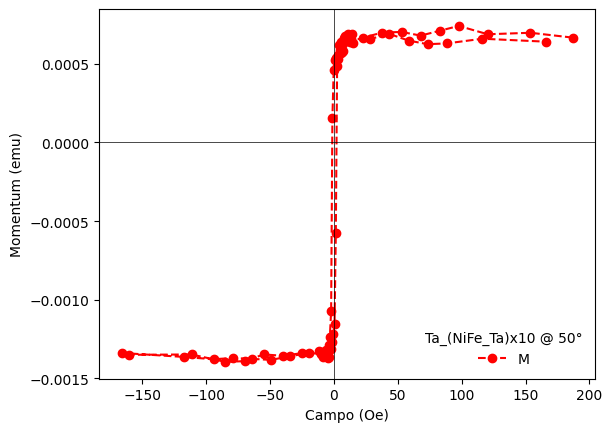

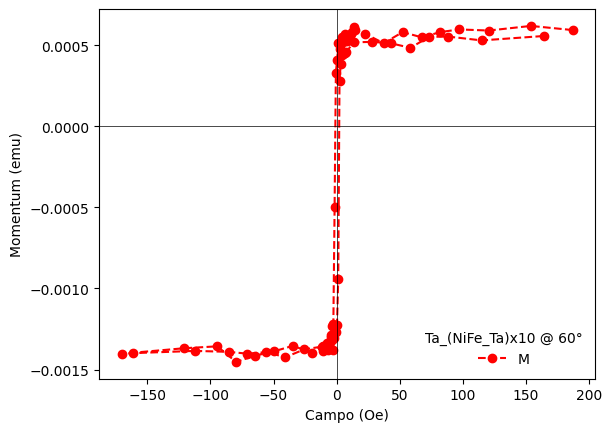

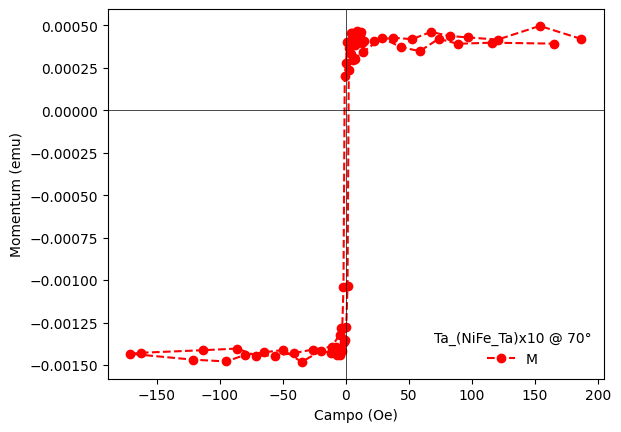

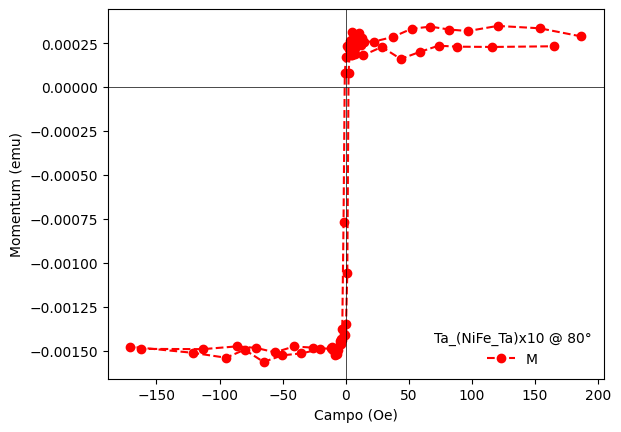

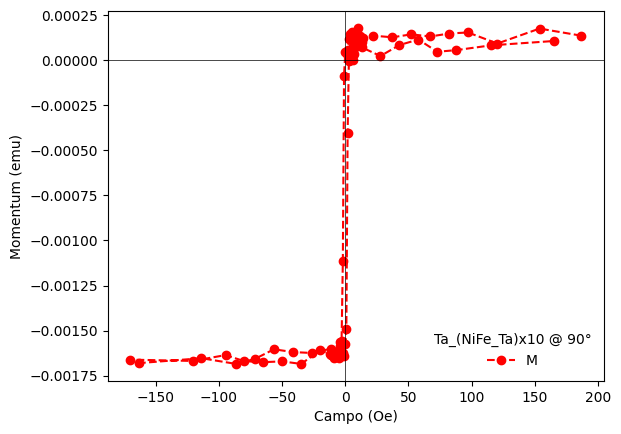

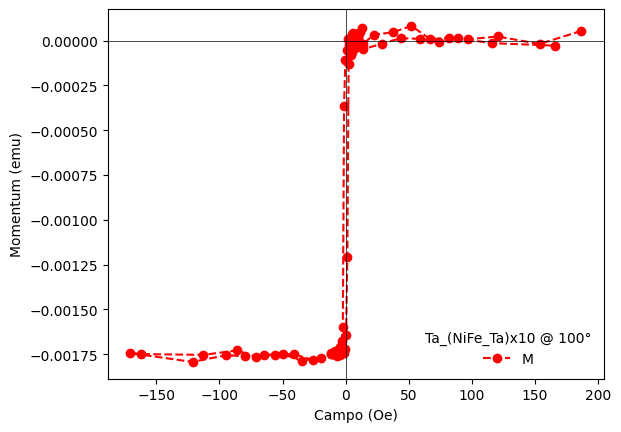

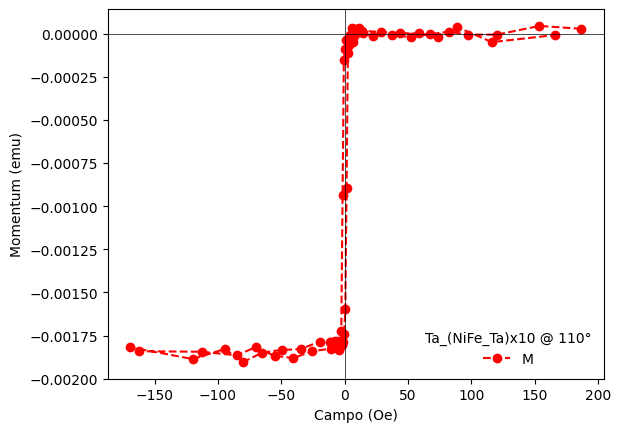

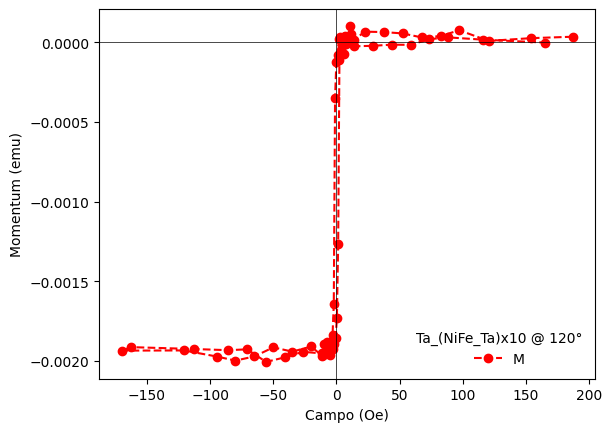

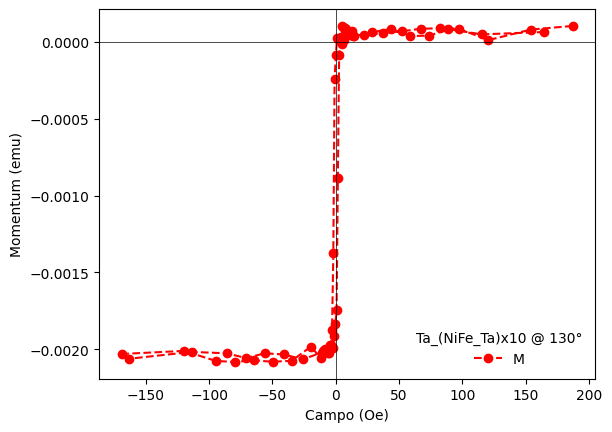

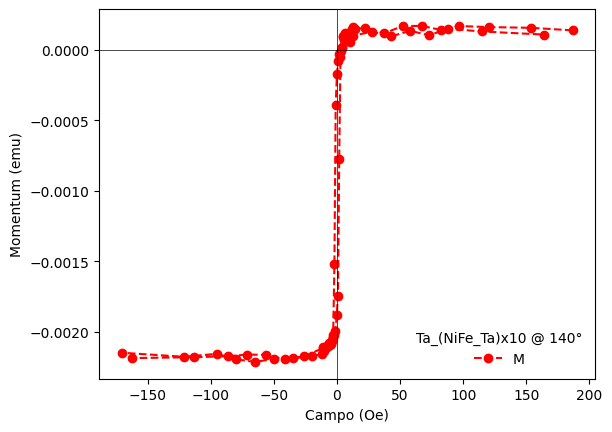

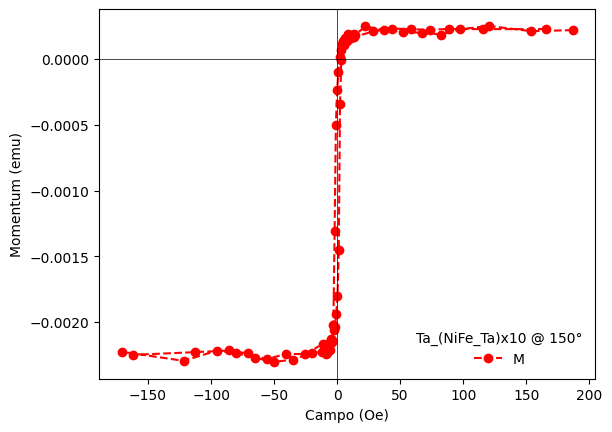

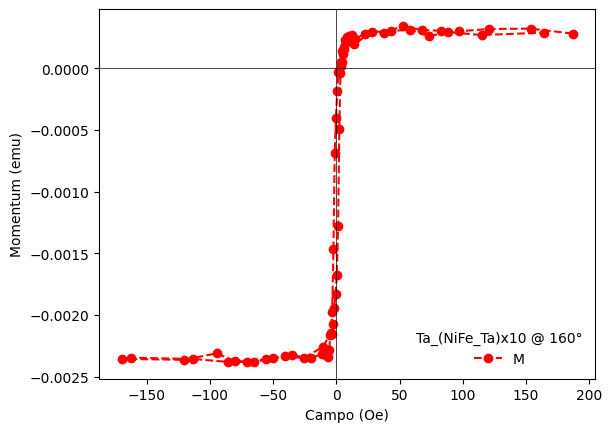

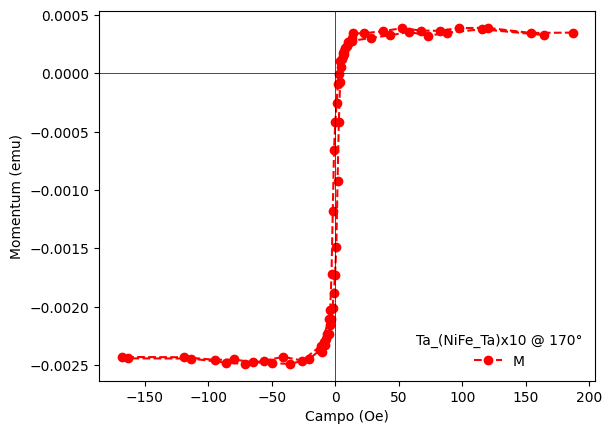

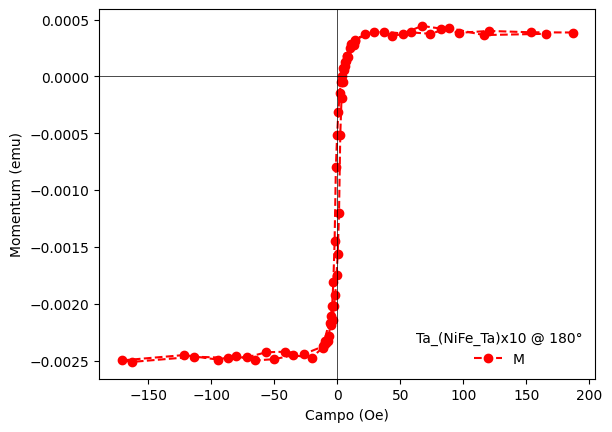

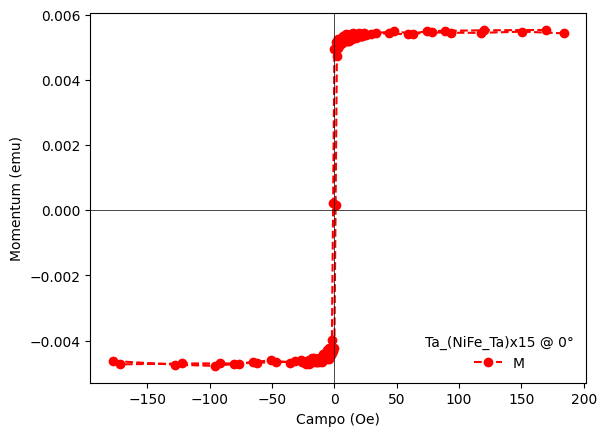

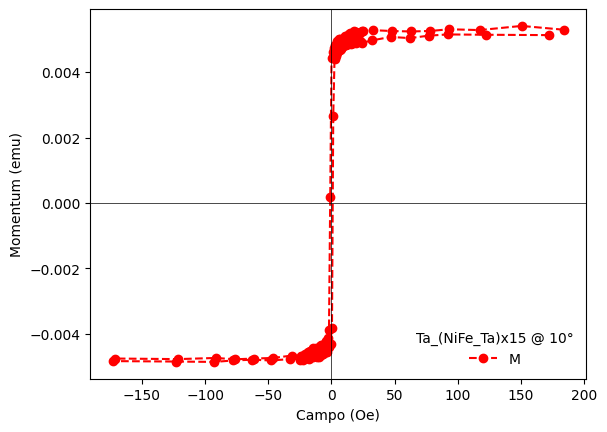

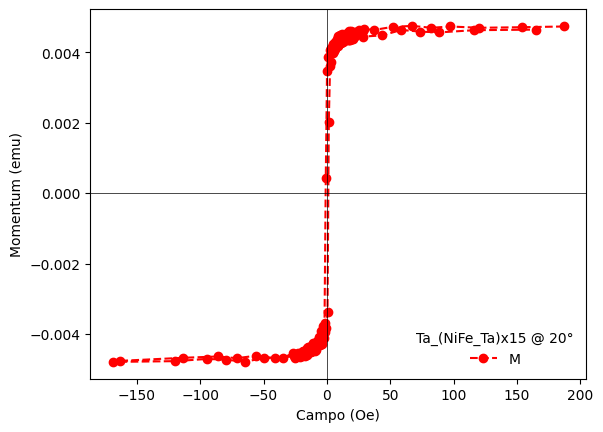

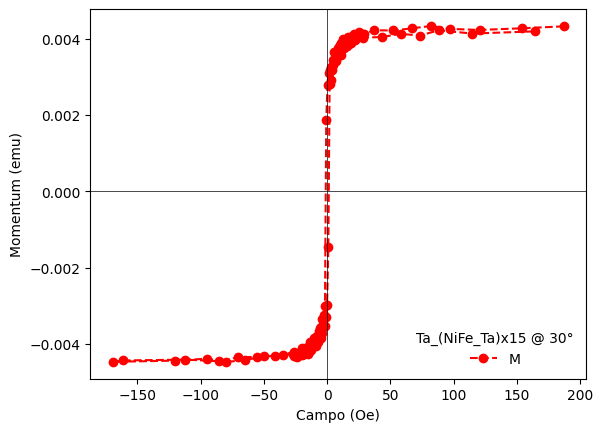

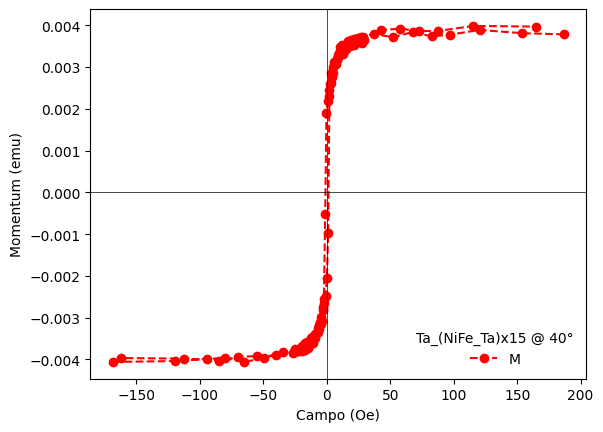

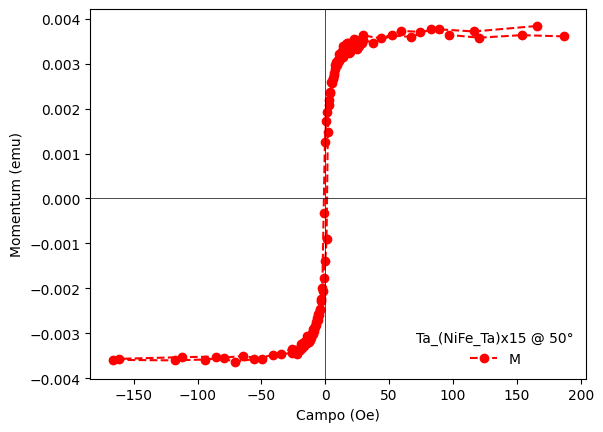

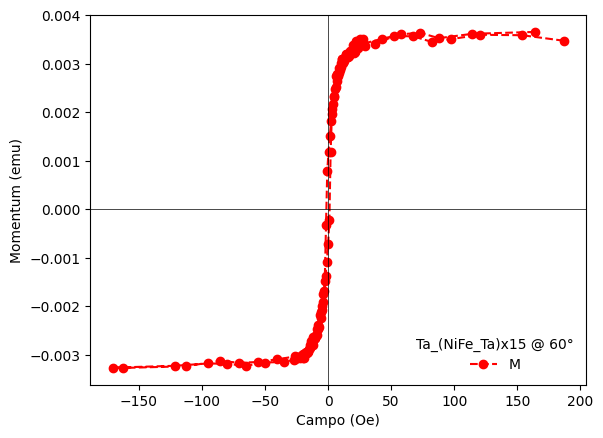

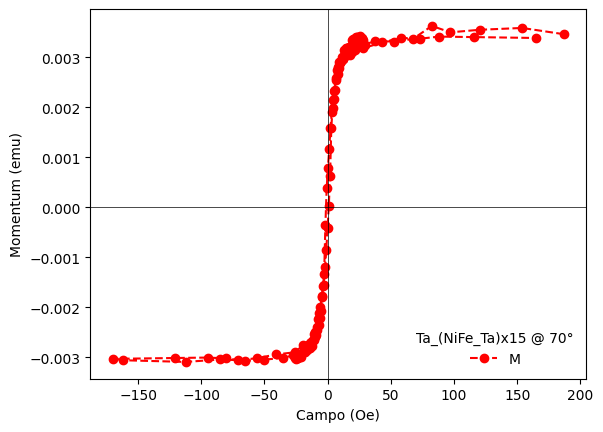

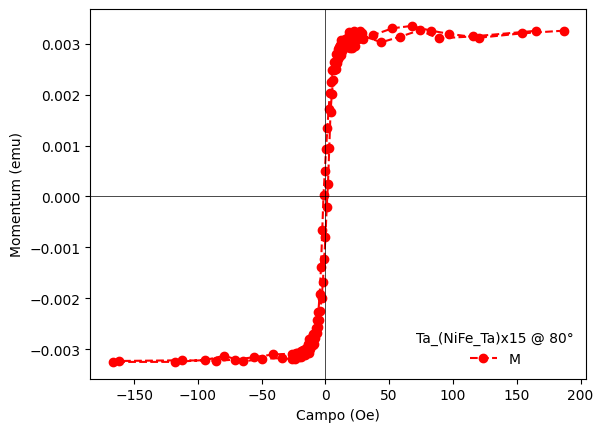

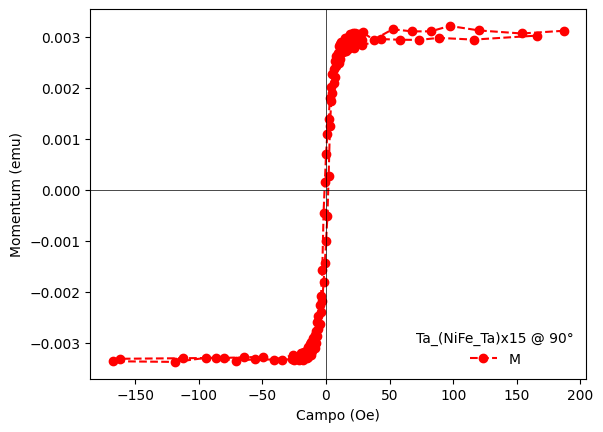

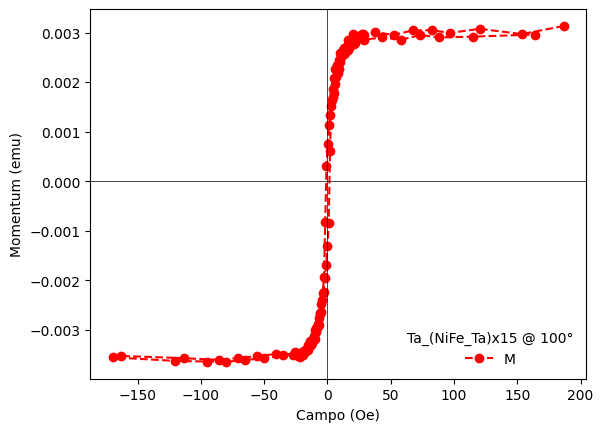

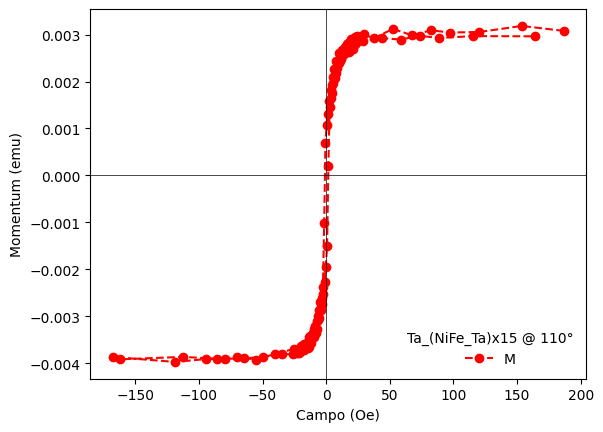

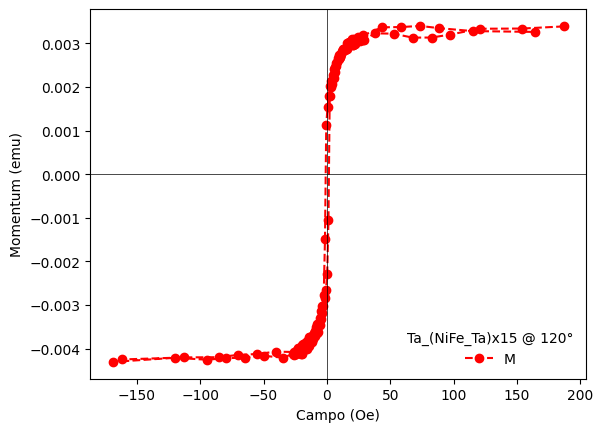

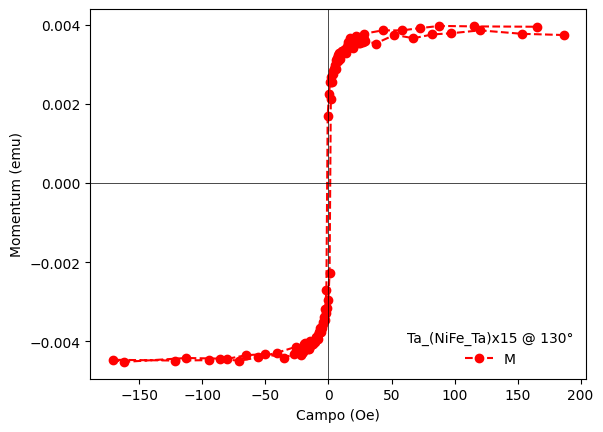

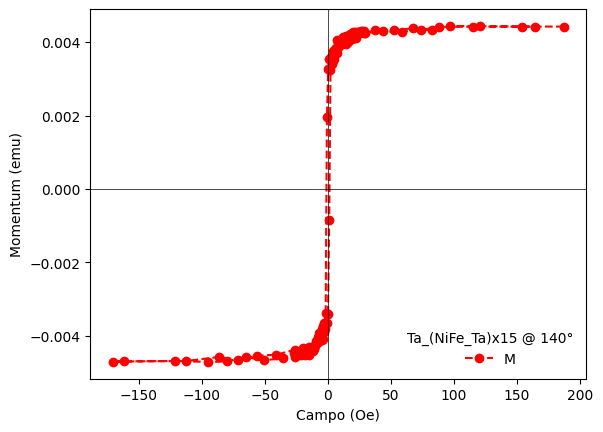

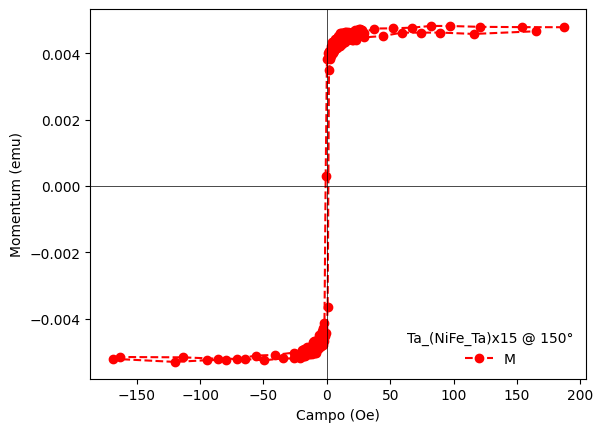

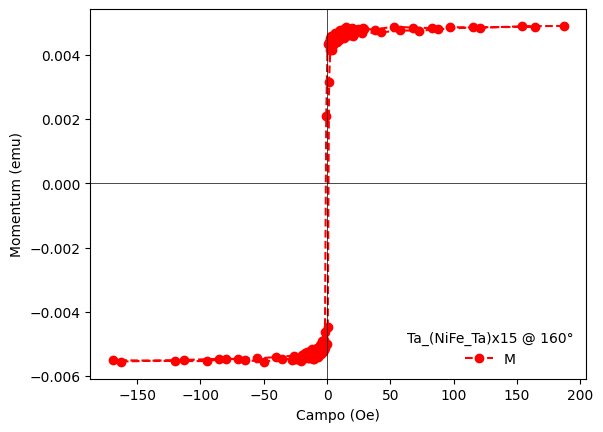

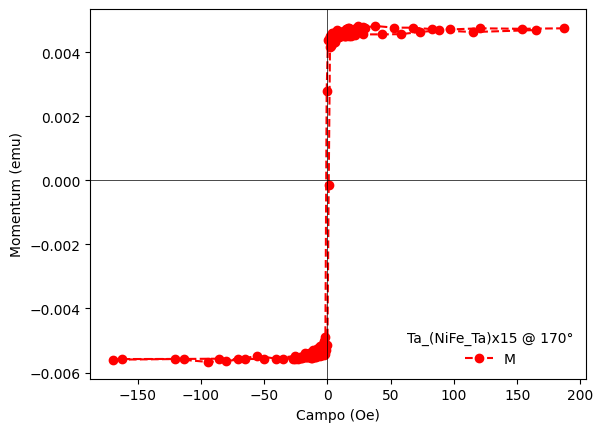

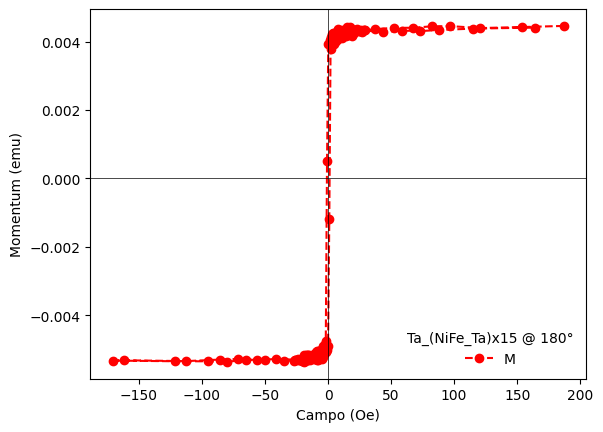

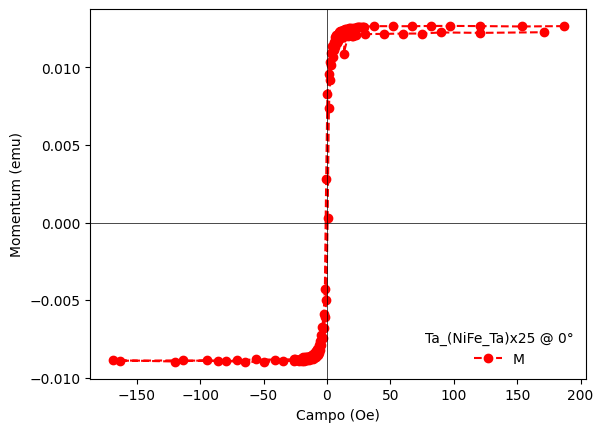

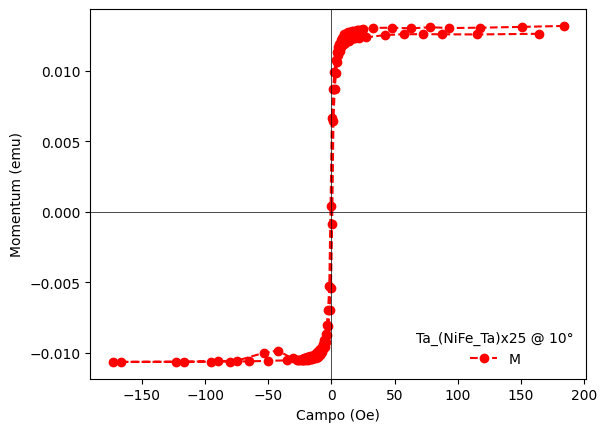

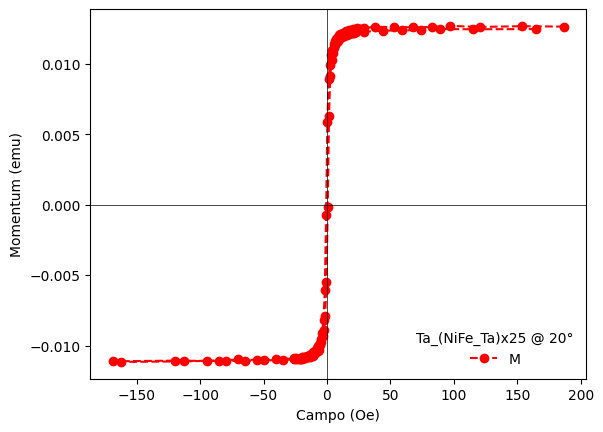

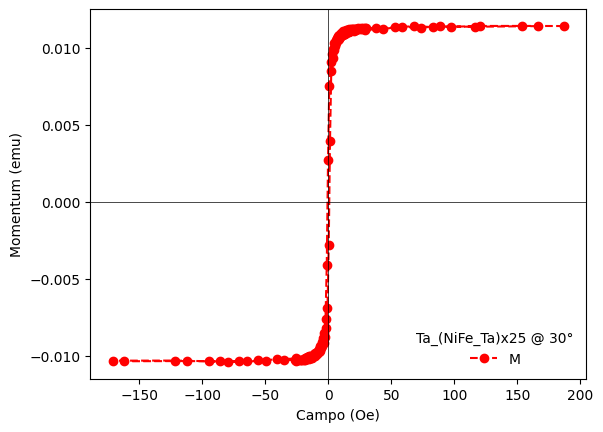

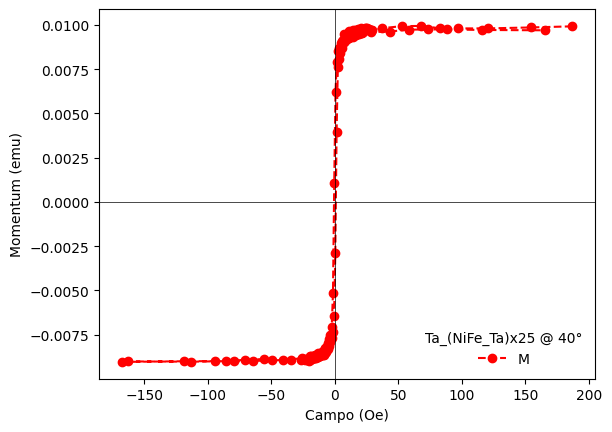

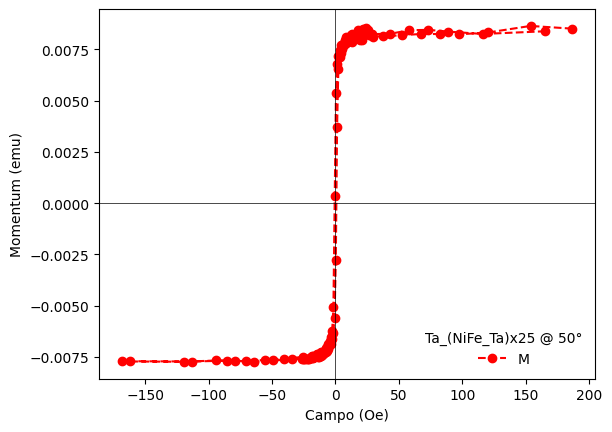

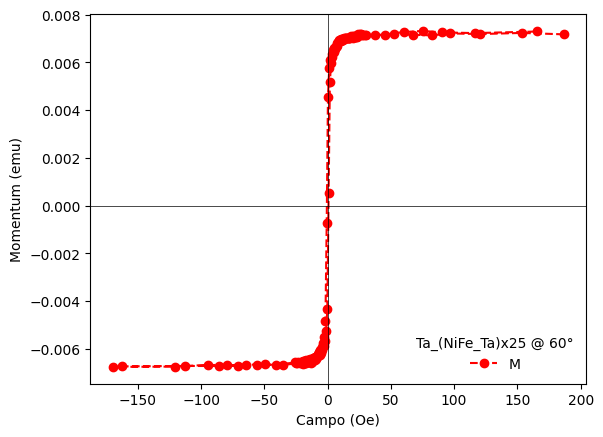

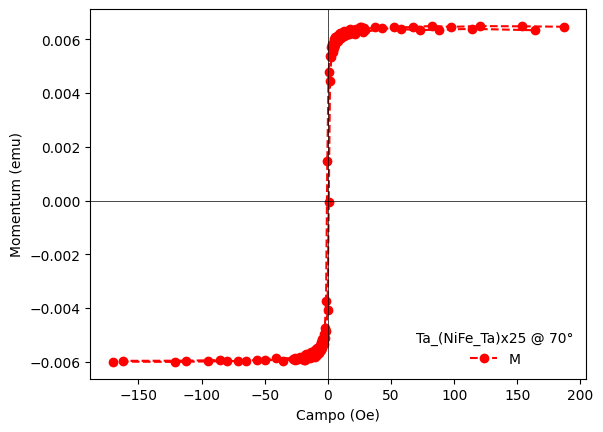

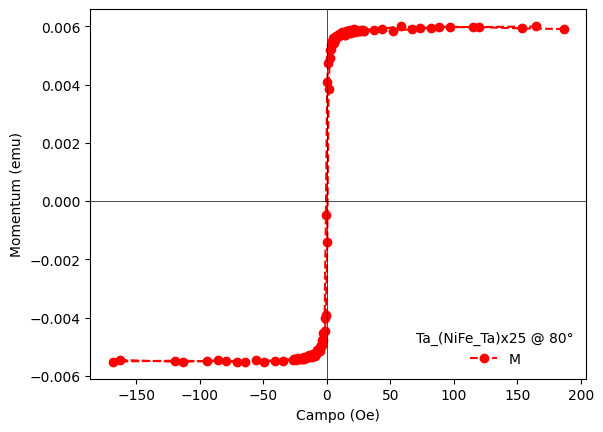

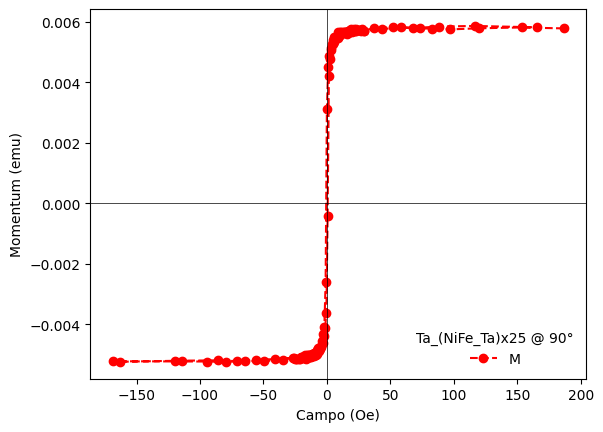

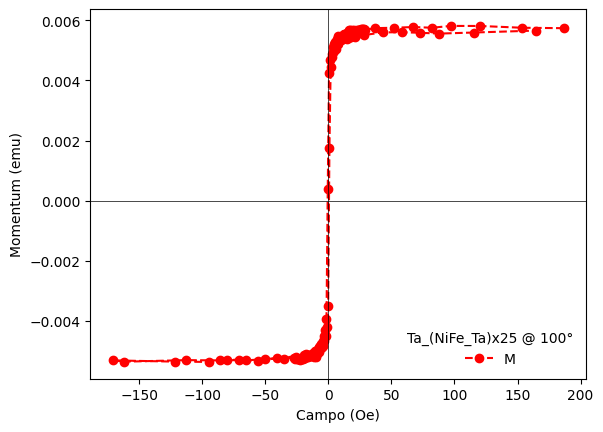

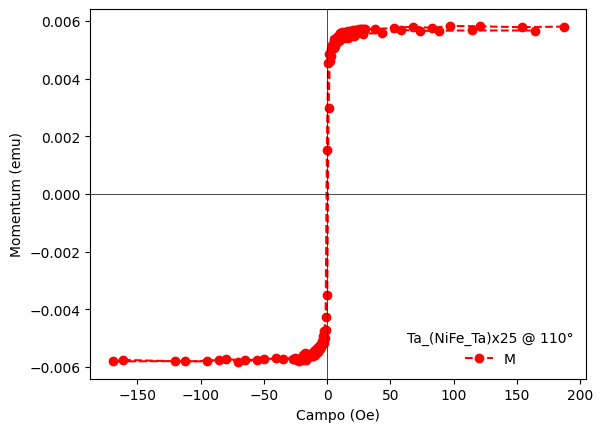

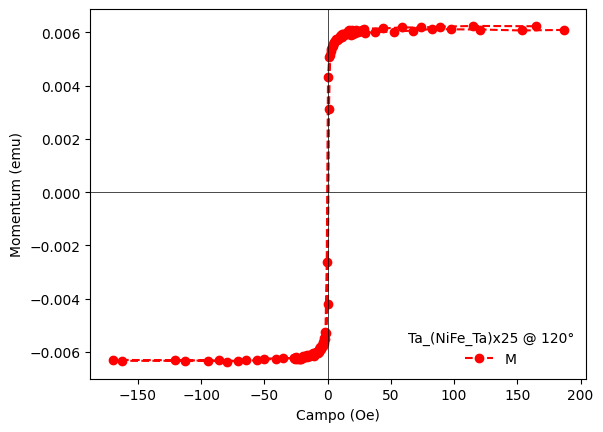

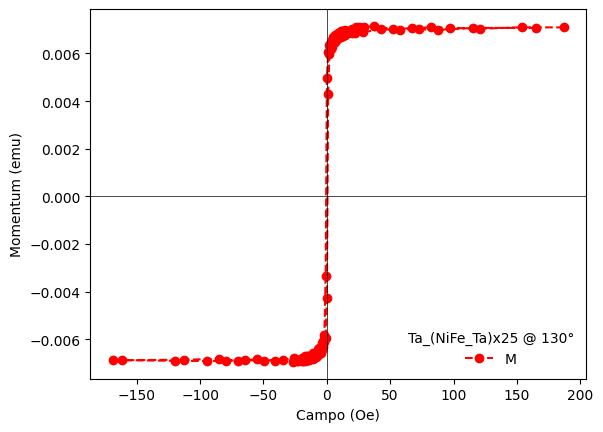

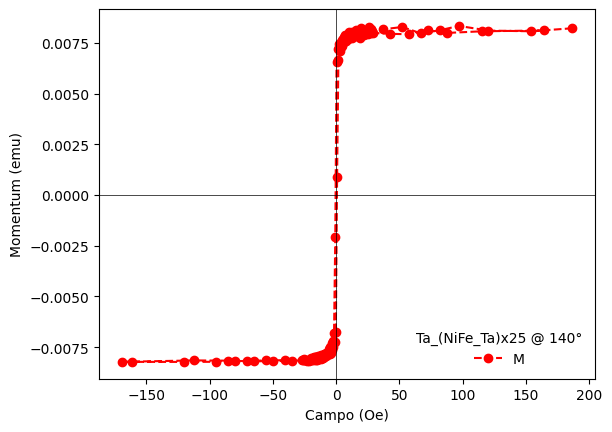

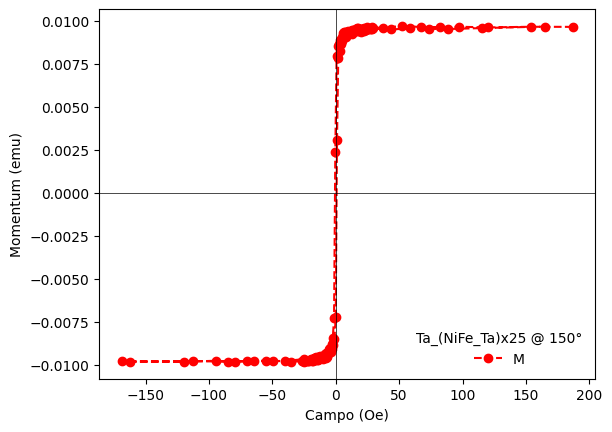

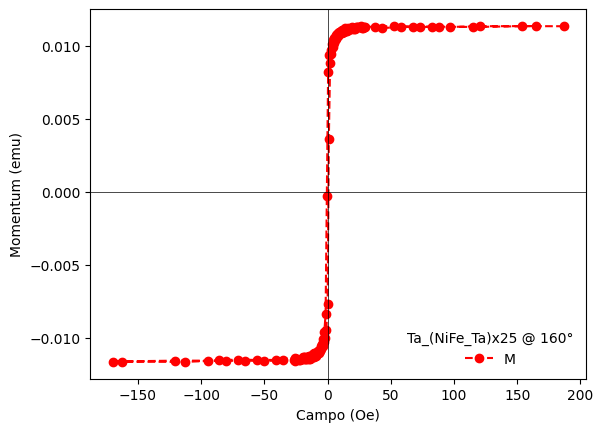

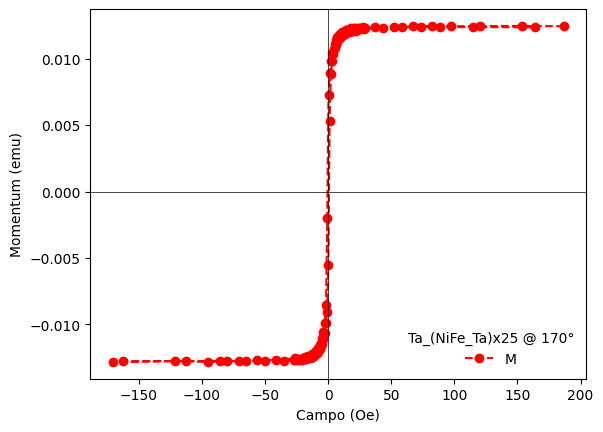

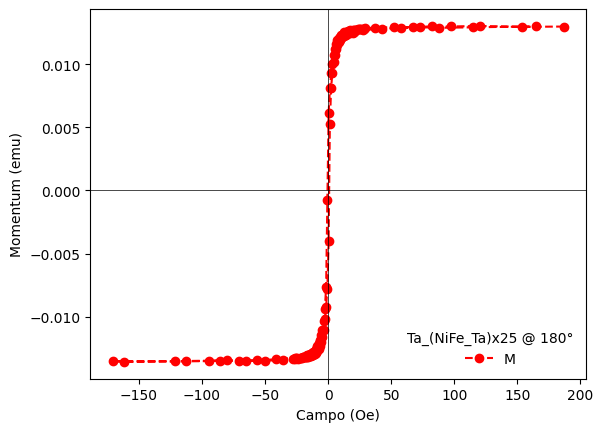

In [2]:
"""
CARREANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #biblioteca usada para manipulação de matrizes e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #bibioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios e arquivos -CLEIZA
from caminhosDiretorios import dirDadosDesteDispositivo as dirDados, dirGraficosDesteDispositivo as dirGraficos #de caminhoDosDiretorios.py, chamamos variáveis que guardam respectivamente o caminho do diretório onde estão os arquivos de dados deste dispositivo e o caminho do diretório onde serão salvos os gráficos neste dispositivo -ABQ
from funcoesNomeDeArquivo import extrair_angulo, nomeConcatenadoDaAmostra #de funcoesNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosCrus/". -ABQ
subdiretorioAVarrer = dirDados+"dadosCrusMenos12/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

#ordena os arquivos por ordem alfabética -ABQ
arquivos_txt.sort()

# Itera sobre os arquivos para criar os gráficos
for arquivo_txt in arquivos_txt:
    #extrai o nome da amostra do arquivo -ABQ
    nomeDaAmostraEAngulo = f"{nomeConcatenadoDaAmostra(arquivo_txt)} @ {extrair_angulo(arquivo_txt)}°"

    # Extrai o ângulo do nome do arquivo
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(subdiretorioAVarrer, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]
    
    # Plota a curva de histerese -CLEIZA
    plt.plot(campo, magnetizacao, "--o", color='red', label="M")

    # Adiciona linhas de eixo
    plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
    plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

    
    # Adiciona rótulos com tamanho de fonte personalizado -CLEIZA
    plt.xlabel('Campo (Oe)')
    plt.ylabel('Momentum (emu)')
    plt.legend( loc = "lower right", title=f"{nomeDaAmostraEAngulo}", frameon=False)

    #cria um diretorio graficosCrus dentro do diretorio graficosGerados, caso ele ainda não exista -ABQ
    os.makedirs(f"{dirGraficos}/graficosCrus", exist_ok=True)

    #salva a figura em formato png dentro do diretorio graficosCrus, que por sua vez fica no diretorio graficosGerados -ABQ
    #plt.savefig(f"{dirGraficos}/graficosCrus/{nomeDaAmostraEAngulo} Cru.png", dpi=300)
    
    # Exibe o gráfico -CLEIZA
    plt.show()